# 5. ENTRENAMIENTO

## 5.1. Imports y settings previos

In [1]:
#Nos conectamos a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ejecutamos el colab anterior que contione los imports anteriores y las funcion de preprocesadmiento, recordar que hay que subir los archivos proporcionados por la profesora requirements.txt y utils.py

In [3]:
%run "/content/drive/My Drive/Colab Notebooks/4_Preprocesado.ipynb"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 26.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.8 MB/s eta 0:00:00
     ━━━

  Using cached mxnet_mkl-1.6.0-py2.py3-none-manylinux1_x86_64.whl (76.7 MB)
  Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.1 which is incompatible.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [6]:
def calcula_metricas(confmat):

    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)

    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

## 5.2 Descarga datasets

Vamos a descargarnos el dataset ya con sus etiquetas y divisiones

In [7]:
data_train = pd.read_csv("/content/drive/MyDrive/practica_NPL/data_train.csv", sep=',')
data_train.shape

(3399, 1)

In [8]:
labels_train = pd.read_csv("/content/drive/MyDrive/practica_NPL/labels_train.csv", sep=',')
labels_train.shape

(3399, 1)

In [9]:
data_train.head()

,reviewText
0,one of the best programs to use
1,"Do yourself a Favor, and Upgrade from Windows ..."
2,I highly recommend toast I haven't I'm on my mac
3,This simple little connection and software rep...
4,Slapping a smartphone interface on a workstati...


In [10]:
labels_train.head()

,labels
0,1
1,1
2,1
3,1
4,0


In [11]:
data_test = pd.read_csv("/content/drive/MyDrive/practica_NPL/data_test.csv", sep=',')
data_test.shape

(600, 1)

In [12]:
labels_test = pd.read_csv("/content/drive/MyDrive/practica_NPL/labels_test.csv", sep=',')
labels_test.shape

(600, 1)

In [13]:
# Convertir el DataFrame en una lista
data_train = data_train['reviewText'].tolist()
data_test = data_test['reviewText'].tolist()

labels_train = labels_train['labels'].tolist()
labels_test = labels_test['labels'].tolist()

In [14]:
# Verificar la forma de la lista resultante
print(len(data_train))  # La longitud de la lista es el número de filas
print(data_train[:5])  # Imprime las primeras 5 filas como ejemplo
print(labels_train[:5])  # Imprime las primeras 5 filas como ejemplo

3399
['one of the best programs to use', 'Do yourself a Favor, and Upgrade from Windows 2000. Install "Microsoft Office XP Professional Upgrade, by Microsoft," and watch 98% of your computer woes vanish before your eyes ! Do the Updates, and watch the remaining 2% disappear, without a trace.\nI did a Format C:, installed Windows 2000, Upgraded to XP Professional & the PC is running Smooth. The Internet runs more smoothly than I have EVER seen, before. The package comes with a Firewall. Games run very, very smoothly. The computer is so quiet, you barely realize you are even online.\nI had a hard time getting standard software to run on Windows ME, but XP makes everything EASY, and makes it a joy to work on the PC. No more headaches. No more searching for patches on the internet.\nThis package has it all. I work in IT and do troubleshooting all day. Now, I do not have to come home and work on MY PC, as well. XP is the answer to most of your PC problems. This software will more than pay f

## 5.3 Preprocesamiento

Usamos la funcion creada en el apartado 4.4

In [15]:
features_train, features_test = preprocesamiento(data_train, data_test)

<ipython-input-3-24e810deed88>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(review, "html5lib").get_text()


Wrote preprocessed data to cache file: preprocessed_data.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Wrote features to cache file: bow_features.pkl


Vamos a realizar algunas comprobaciones de nuestro preprocesamiento:

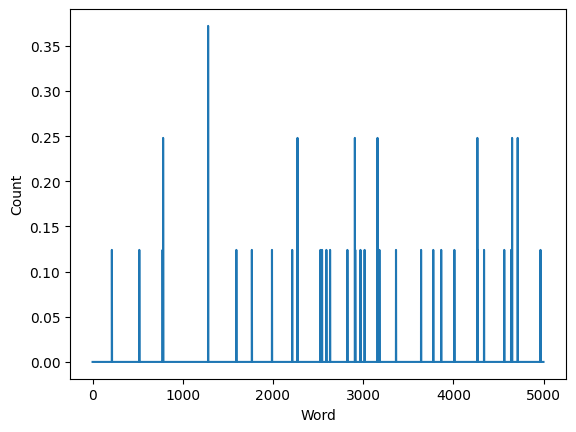

In [16]:
#Frecuencia de las palabras. Observamos algunos outliers.
#Esos datos tienen q ser significativos dado que se ha realizado un preprocesamiento previo
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

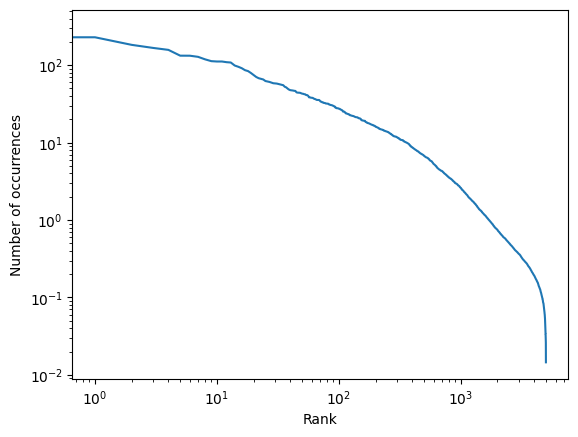

In [17]:
#Observamos la ley de Zipf
word_freq = features_train.sum(axis=0)

sorted_word_freq = np.sort(word_freq)[::-1]

plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

## 5.4 Entrenamiento

En los siguientes apartados vamos a pasar al entrenamiento de los modelos elegidos, los cuales son un modelo regresion logistica y SVM.
En cada apartado explicaremos por que hemos elegido estos modelos. Ademas cada modelo viene acompanados de las siguientes metricas:

ACC (Accuracy): La precisión es la proporción de predicciones correctas en relación con el número total de predicciones realizadas por el modelo.

SEN (Sensibilidad o Recall): La sensibilidad mide la proporción de verdaderos positivos (muestras positivas clasificadas correctamente) en relación con el número total de muestras positivas en el conjunto de datos.

ESP (Especificidad): La especificidad mide la proporción de verdaderos negativos (muestras negativas clasificadas correctamente) en relación con el número total de muestras negativas en el conjunto de datos.

PPV (Positive Predictive Value o Precisión en positivos): La precisión en positivos mide la proporción de verdaderos positivos en relación con el número total de predicciones positivas realizadas por el modelo.

FSC (F1-Score): El puntaje F1 es una medida que combina la precisión y la sensibilidad en una sola métrica.

## 5.5 Modelo Regresion logistica

Se ha elegido este modelo debido principamente a su sencillez y a su facil comprension en cualquier tipo de tarea, y para a partir de el poder comparar los siguientes modelos.
Para la obtencion de los parametros se ha optado por usar Gridsearch y unos valores standards para su busqueda.







In [ ]:

vectorC_1 = np.logspace(-3,3,21)
param_grid_1 = {'C': vectorC_1 }

grid_1 = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'),
                    scoring='f1',
                    param_grid=param_grid_1,
                    cv = 10)

grid_1.fit(features_train, labels_train)

print("best mean cross-validation score: {:.3f}".format(grid_1.best_score_))
print("best parameters: {}".format(grid_1.best_params_))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best mean cross-validation score: 0.797
best parameters: {'C': 7.943282347242813}


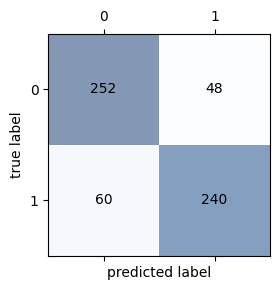

ACC:  0.82
SEN:  0.8
ESP:  0.84
PPV:  0.8333333333333334
FSC:  0.816326530612245


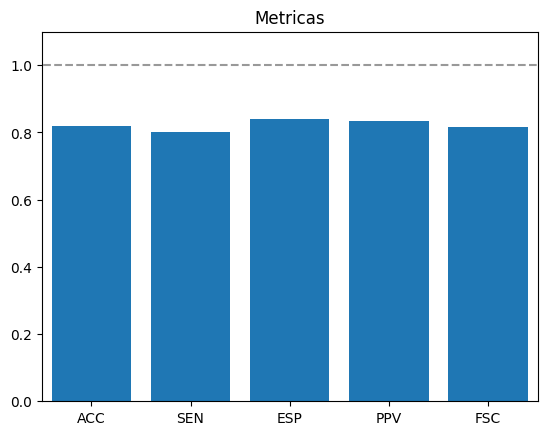

In [ ]:
Copt_1 = grid_1.best_params_['C']

lr = LogisticRegression(random_state=0, C = Copt_1).fit(features_train, labels_train)
y_pred_1 = lr.predict(features_test)

confmat_test_1  = confusion_matrix(labels_test, y_pred_1)
plot_confusion_matrix(confmat_test_1)
calcula_metricas(confmat_test_1)

## 5.6 Modelo con SVM

Se ha decidido utilizar como siguiente modelo un SVM debido a que es una opcion solida para manejar datos no lineales, tienen un alto rendimiento en alta dimensionalidad, flexibilidad en la eleccion de funciones kernel y venia recomendado en diferentes articulos en la web para tratar problemas de analisis de sentimiento.

Para la obtencion de los parametros optimos se utilizo Gridsearch y se obtuvieron unos valores de {'C': 2.154434690031882, 'gamma': 0.46415888336127725} , comentar que la busqueda de estos valores es muy lenta y por ello esta comentada los comandos que la realizan y los valores estan incluidos a mano.

In [ ]:


#vectorC_2 = np.logspace(-3, 3, 10)
#vectorG_2 = np.logspace(-5, 1, 10)

#param_grid_2 = {'C': vectorC_2, 'gamma':vectorG_2}


#grid_2 = GridSearchCV(SVC(kernel='rbf'),scoring='accuracy', param_grid=param_grid_2, cv=3, verbose=1).fit(features_train, labels_train)


######

#print("best mean cross-validation score: {:.3f}".format(grid_2.best_score_))
#print("best parameters: {}".format(grid_2.best_params_))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
best mean cross-validation score: 0.794
best parameters: {'C': 2.154434690031882, 'gamma': 0.46415888336127725}


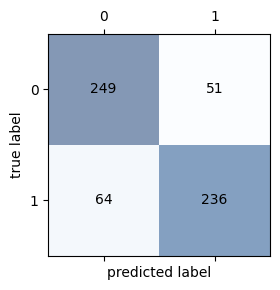

ACC:  0.8083333333333333
SEN:  0.7866666666666666
ESP:  0.83
PPV:  0.8222996515679443
FSC:  0.8040885860306645


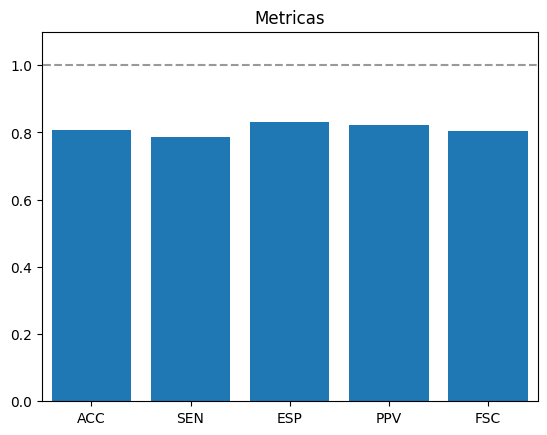

In [18]:
#{'C': 2.154434690031882, 'gamma': 0.46415888336127725}
#mostramos prestaciones en test
#Copt_2 = grid_2.best_params_['C']
#Gopt_2 = grid_2.best_params_['gamma']
Copt_2 = 2.154434690031882
Gopt_2 = 0.46415888336127725
svmModel3 = SVC(kernel='rbf',gamma = Gopt_2, C = Copt_2, probability=True).fit(features_train,labels_train)

y_pred_2 = svmModel3.predict(features_test)

confmat_test_2  = confusion_matrix(labels_test, y_pred_2)
plot_confusion_matrix(confmat_test_2)
calcula_metricas(confmat_test_2)

## 5.7 Conclusiones

A la vista de los datos obtenidos podemos considerar que ambos modelos son validos para el analisis de sentimientos ya que obtenemos unos resultados en ambos modelos por encima del 80%.
Tambien podemos considerar que su desempeño es practicamente el mismo ya que la diferencia entre metricas es apenas unas decimas.
Cabe destacar que se esperaria un mejor rendimento del modelo SVM, pero seguramente debido a la falta de datos el desempeño no se ve adecuadamente reflejado en las metricas, esto es debido a que es un modelo no lineal y tiene mas parametros que ajustar que una regresion logistica.